In [2]:
import numpy as np
from scipy.special import erf
import os
import sys
import time
import copy
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)

from estimator.NoisyMax import NoisyMaxEstimator, NoisyMaxVariant, gen_demo_test_neighbors
from analysis.commons import batch_estimator_estimated_delta, compute_bootstrap_range
from utils.constants import WORKERS

In [3]:
def generate_default_configuration():
    epsilon = 0.3
    claimed_epsilon = 0.3
    gamma = 0.01

    dataset_settings = {
        'database_0': np.array([1, 1, 1, 1, 0, 0, 0]),
        'database_1': np.array([0, 0, 0, 0, 0, 0, 0]),
        'outcomes_size': 2,
        'sensitivity': 1,
        'epsilon': epsilon,
        'claimed_epsilon': claimed_epsilon,
    }

    kwargs = {
        'nm_variant': NoisyMaxVariant.NM1,
        'dataset_settings': dataset_settings,
        'random_seed': int(time.time()),
        'gamma': 0.01,
        'training_set_size': 10 ** 7, 'validation_set_size': 10 ** 7
    }
    
    return kwargs

def store_array_str(data_array):
    converted_str = np.array_str(data_array)
    converted_str = converted_str.replace(' ',',')
    return converted_str

In [4]:
logfile_path = os.path.join(log_dir, 'kNN-noisy_max-default.log')

logging.basicConfig(
        level=logging.CRITICAL,
        format="%(asctime)s %(message)s",
        handlers=[
            logging.FileHandler(logfile_path),
            logging.StreamHandler()
        ]
    )

logging.info('Initialize the experimental settings')
kwargs = generate_default_configuration()

In [5]:
claimed_epsilon_list = np.hstack((np.arange(0.01, 0.3, 0.01), np.arange(0.3, 1, 0.05)))
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': NoisyMaxEstimator, 'config': kwargs})
    input_list.append(input_)


estimated_delta_NM1 = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 21:52:59,253 Parallel Compute the empirical error rate requires 233.4971 seconds
2024-12-08 21:52:59,273 Parallel Compute the empirical error rate requires 234.1229 seconds
2024-12-08 21:53:01,499 Parallel Compute the empirical error rate requires 235.1820 seconds
2024-12-08 21:53:03,446 Parallel Compute the empirical error rate requires 237.6630 seconds
2024-12-08 21:53:04,554 Parallel Compute the empirical error rate requires 237.3693 seconds
2024-12-08 21:53:05,589 Parallel Compute the empirical error rate requires 237.1275 seconds
2024-12-08 21:53:06,488 Parallel Compute the empirical error rate requires 240.0022 seconds
2024-12-08 21:53:07,040 Parallel Compute the empirical error rate requires 239.8306 seconds
2024-12-08 21:53:07,173 Parallel Compute the empirical error rate requires 238.0405 seconds
2024-12-08 21:53:07,808 Parallel Compute the empirical error rate requires 242.1388 seconds
2024-12-08 21:53:08,954 Parallel Compute the empirical error rate requires 239.7

In [7]:
kwargs['dataset_settings']['database_0'] = np.array([1, 1, 1, 1])
kwargs['dataset_settings']['database_1'] = np.array([0, 0, 0, 0])
kwargs['nm_variant'] = NoisyMaxVariant.NM2
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': NoisyMaxEstimator, 'config': kwargs})
    input_list.append(input_)

estimated_delta_NM2 = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 22:02:26,254 Parallel Compute the empirical error rate requires 236.9834 seconds
2024-12-08 22:02:28,521 Parallel Compute the empirical error rate requires 238.5256 seconds
2024-12-08 22:02:29,221 Parallel Compute the empirical error rate requires 239.8537 seconds
2024-12-08 22:02:31,365 Parallel Compute the empirical error rate requires 241.5422 seconds
2024-12-08 22:02:31,587 Parallel Compute the empirical error rate requires 240.1738 seconds
2024-12-08 22:02:31,888 Parallel Compute the empirical error rate requires 241.8291 seconds
2024-12-08 22:02:32,899 Parallel Compute the empirical error rate requires 242.3784 seconds
2024-12-08 22:02:34,869 Parallel Compute the empirical error rate requires 245.2780 seconds
2024-12-08 22:02:35,109 Parallel Compute the empirical error rate requires 244.9479 seconds
2024-12-08 22:02:36,017 Parallel Compute the empirical error rate requires 245.3604 seconds
2024-12-08 22:02:36,556 Parallel Compute the empirical error rate requires 246.0

In [8]:
kwargs['dataset_settings']['database_0'] = np.array([1, 1, 1, 1, 0, 0, 0])
kwargs['dataset_settings']['database_1'] = np.array([0, 0, 0, 0, 0, 0, 0])
kwargs['nm_variant'] = NoisyMaxVariant.NM3
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': NoisyMaxEstimator, 'config': kwargs})
    input_list.append(input_)

estimated_delta_NM3 = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 22:07:02,951 Parallel Compute the empirical error rate requires 232.1407 seconds
2024-12-08 22:07:03,296 Parallel Compute the empirical error rate requires 233.7097 seconds
2024-12-08 22:07:05,371 Parallel Compute the empirical error rate requires 234.9664 seconds
2024-12-08 22:07:06,225 Parallel Compute the empirical error rate requires 235.6399 seconds
2024-12-08 22:07:06,410 Parallel Compute the empirical error rate requires 235.8088 seconds
2024-12-08 22:07:06,868 Parallel Compute the empirical error rate requires 235.8625 seconds
2024-12-08 22:07:07,280 Parallel Compute the empirical error rate requires 236.7363 seconds
2024-12-08 22:07:08,683 Parallel Compute the empirical error rate requires 239.6814 seconds
2024-12-08 22:07:10,069 Parallel Compute the empirical error rate requires 239.5788 seconds
2024-12-08 22:07:10,157 Parallel Compute the empirical error rate requires 239.3425 seconds
2024-12-08 22:07:10,371 Parallel Compute the empirical error rate requires 239.6

In [9]:
kwargs['dataset_settings']['database_0'] = np.array([1, 1, 1, 1])
kwargs['dataset_settings']['database_1'] = np.array([0, 0, 0, 0])
kwargs['nm_variant'] = NoisyMaxVariant.NM4
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': NoisyMaxEstimator, 'config': kwargs})
    input_list.append(input_)

estimated_delta_NM4 = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 22:11:24,487 Parallel Compute the empirical error rate requires 230.4578 seconds
2024-12-08 22:11:27,765 Parallel Compute the empirical error rate requires 233.7556 seconds
2024-12-08 22:11:29,833 Parallel Compute the empirical error rate requires 234.5686 seconds
2024-12-08 22:11:29,938 Parallel Compute the empirical error rate requires 236.0535 seconds
2024-12-08 22:11:31,006 Parallel Compute the empirical error rate requires 237.2008 seconds
2024-12-08 22:11:32,163 Parallel Compute the empirical error rate requires 237.0073 seconds
2024-12-08 22:11:32,685 Parallel Compute the empirical error rate requires 237.1918 seconds
2024-12-08 22:11:34,234 Parallel Compute the empirical error rate requires 240.2704 seconds
2024-12-08 22:11:35,880 Parallel Compute the empirical error rate requires 240.3177 seconds
2024-12-08 22:11:36,546 Parallel Compute the empirical error rate requires 241.4534 seconds
2024-12-08 22:11:37,127 Parallel Compute the empirical error rate requires 242.3

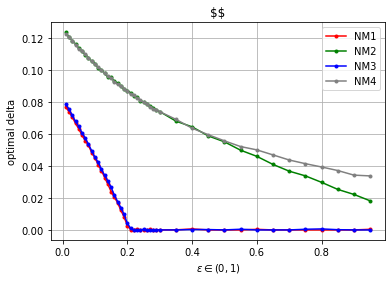

In [10]:
figfile_path = os.path.join(fig_dir, 'Noisy_max.png')

plt.title(r'$\$')
plt.xlabel(r"$\epsilon \in (0,1)$")
plt.ylabel("optimal delta")
plt.grid()

plt.plot(claimed_epsilon_list, estimated_delta_NM1 , linestyle='-', marker='.',color ="red", label=r"NM1")
plt.plot(claimed_epsilon_list, estimated_delta_NM2 , linestyle='-', marker='.',color ="green", label=r"NM2")
plt.plot(claimed_epsilon_list, estimated_delta_NM3 , linestyle='-', marker='.',color ="blue", label=r"NM3")
plt.plot(claimed_epsilon_list, estimated_delta_NM4 , linestyle='-', marker='.',color ="grey", label=r"NM4")
plt.legend(loc='upper right')
plt.savefig(figfile_path, bbox_inches = 'tight', dpi = 150);
plt.show()